In [127]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
import copy
from types import SimpleNamespace
import warnings
warnings.filterwarnings('ignore')

In [128]:
fullData = pd.read_csv("Rtable_3.csv")
fullData.drop(columns=fullData.columns[0], axis=1, inplace=True)


In [129]:
fullData

,Dead,Sexo,Edad_a_os__actual_,dias_estancia,paso_uci,saturaciono_1,saturaciono_2,saturaciono_3,saturaciono_4,temperatura_1,...,Srm-Creatinina_val,Srm-Creatinina_pat,Srm-Urea_val,Srm-Urea_pat,Srm-Sodio_val,Srm-Sodio_pat,Srm-Potasio_val,Srm-Potasio_pat,Srm-Glucosa_val,Srm-Glucosa_pat
0,True,0,86,5.0,0,94.2,95.3,96.0,93.3,37.1,...,1.22,0,45.0,0,140.0,0,4.4,0,78.400002,0
1,False,1,97,10.0,0,95.3,92.9,95.7,93.9,37.3,...,1.80,1,94.0,1,153.0,1,4.7,0,116.800003,1
2,True,1,94,3.0,0,69.7,43.0,40.0,50.9,35.0,...,1.04,0,63.0,1,139.0,0,5.0,0,152.300003,1
3,False,1,91,8.0,0,96.0,93.8,94.2,97.1,36.1,...,2.54,1,110.0,1,140.0,0,4.7,0,436.299988,2
4,False,0,90,8.0,0,95.6,95.5,94.2,94.7,36.6,...,0.88,0,50.0,0,141.0,0,3.9,0,157.100006,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,False,1,50,3.0,0,95.0,95.3,95.3,94.5,37.0,...,0.53,0,19.0,0,139.0,0,4.2,0,80.199997,0
1395,False,1,34,3.0,0,98.0,97.0,97.5,97.0,37.2,...,0.66,0,16.0,0,140.0,0,3.7,0,121.199997,1
1396,False,1,63,7.0,0,96.0,96.8,95.4,95.6,36.8,...,0.67,0,34.0,0,137.0,0,3.8,0,143.600006,1
1397,False,1,32,1.0,0,98.5,98.0,97.0,98.0,36.3,...,0.80,0,11.0,0,141.0,0,3.7,0,88.300003,0


In [130]:
fullvars = fullData.columns.values.tolist()
fullvars.remove('Dead') #since we cant use dead to predict dias estancia(?)
limitvars = [ #all variables except dias, paso por uci, and any time vars that arent 1, since you couldn't determine what a measurement corresponds to
       "dias_estancia",'Sexo', 'Edad_a_os__actual_', 
       'saturaciono_1', 
       'temperatura_1', 
       'frecuenciac_1', 
       'sysPres_1',
       'diasPres_1',
       'tiposaturac_GafasO2_1',
       'tiposaturac_VMK_1', 
        'tiposaturac_Optiflow_1',
       'San-Basófilos_absVal_pat',
       'San-Basófilos_Pct_pat', 'San-Basófilos_absVal',
       'San-Basófilos_Pct', 'San-Eosinófilos_absVal_pat',
       'San-Eosinófilos_Pct_pat', 'San-Eosinófilos_absVal',
       'San-Eosinófilos_Pct', 'San-Linfocitos_absVal_pat',
       'San-Linfocitos_Pct_pat', 'San-Linfocitos_absVal',
       'San-Linfocitos_Pct', 'San-Monocitos_absVal_pat',
       'San-Monocitos_Pct_pat', 'San-Monocitos_absVal',
       'San-Monocitos_Pct', 'San-Neutrófilos_absVal_pat',
       'San-Neutrófilos_Pct_pat', 'San-Neutrófilos_absVal',
       'San-Neutrófilos_Pct', 'Srm-Creatinina_val', 'Srm-Creatinina_pat',
       'Srm-Urea_val', 'Srm-Urea_pat', 'Srm-Sodio_val', 'Srm-Sodio_pat',
       'Srm-Potasio_val', 'Srm-Potasio_pat', 'Srm-Glucosa_val',
       'Srm-Glucosa_pat'
]

In [131]:
pac_vars = [
#     "Id_Paciente",
    "dias_estancia",
    "Sexo",    
    # "paso_uci,"
    "Edad_a_os__actual_"
]
time_vars = ['saturaciono_1', 'saturaciono_2', 'saturaciono_3', 'saturaciono_4',
       'temperatura_1', 'temperatura_2', 'temperatura_3', 'temperatura_4',
       'frecuenciac_1', 'frecuenciac_2', 'frecuenciac_3', 'frecuenciac_4',
       'sysPres_1', 'sysPres_2', 'sysPres_3', 'sysPres_4', 'diasPres_1',
       'diasPres_2', 'diasPres_3', 'diasPres_4'
]
ventilator_vars = ['tiposaturac_GafasO2_1',
       'tiposaturac_GafasO2_2', 'tiposaturac_GafasO2_3',
       'tiposaturac_GafasO2_4', 'tiposaturac_VMK_1', 'tiposaturac_VMK_2',
       'tiposaturac_VMK_3', 'tiposaturac_VMK_4', 'tiposaturac_Optiflow_1',
       'tiposaturac_Optiflow_2', 'tiposaturac_Optiflow_3',
       'tiposaturac_Optiflow_4'
]
blood_vars = ['San-Basófilos_absVal_pat',
       'San-Basófilos_Pct_pat', 'San-Basófilos_absVal',
       'San-Basófilos_Pct', 'San-Eosinófilos_absVal_pat',
       'San-Eosinófilos_Pct_pat', 'San-Eosinófilos_absVal',
       'San-Eosinófilos_Pct', 'San-Linfocitos_absVal_pat',
       'San-Linfocitos_Pct_pat', 'San-Linfocitos_absVal',
       'San-Linfocitos_Pct', 'San-Monocitos_absVal_pat',
       'San-Monocitos_Pct_pat', 'San-Monocitos_absVal',
       'San-Monocitos_Pct', 'San-Neutrófilos_absVal_pat',
       'San-Neutrófilos_Pct_pat', 'San-Neutrófilos_absVal',
       'San-Neutrófilos_Pct'
]

In [132]:
current_variables = fullvars #removing dead since we don't know for a patient going in.
# current_variables = fullvars
plugin=fullData[current_variables]
plugin

,Sexo,Edad_a_os__actual_,dias_estancia,paso_uci,saturaciono_1,saturaciono_2,saturaciono_3,saturaciono_4,temperatura_1,temperatura_2,...,Srm-Creatinina_val,Srm-Creatinina_pat,Srm-Urea_val,Srm-Urea_pat,Srm-Sodio_val,Srm-Sodio_pat,Srm-Potasio_val,Srm-Potasio_pat,Srm-Glucosa_val,Srm-Glucosa_pat
0,0,86,5.0,0,94.2,95.3,96.0,93.3,37.1,36.6,...,1.22,0,45.0,0,140.0,0,4.4,0,78.400002,0
1,1,97,10.0,0,95.3,92.9,95.7,93.9,37.3,37.0,...,1.80,1,94.0,1,153.0,1,4.7,0,116.800003,1
2,1,94,3.0,0,69.7,43.0,40.0,50.9,35.0,36.2,...,1.04,0,63.0,1,139.0,0,5.0,0,152.300003,1
3,1,91,8.0,0,96.0,93.8,94.2,97.1,36.1,36.0,...,2.54,1,110.0,1,140.0,0,4.7,0,436.299988,2
4,0,90,8.0,0,95.6,95.5,94.2,94.7,36.6,36.6,...,0.88,0,50.0,0,141.0,0,3.9,0,157.100006,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1394,1,50,3.0,0,95.0,95.3,95.3,94.5,37.0,36.6,...,0.53,0,19.0,0,139.0,0,4.2,0,80.199997,0
1395,1,34,3.0,0,98.0,97.0,97.5,97.0,37.2,37.0,...,0.66,0,16.0,0,140.0,0,3.7,0,121.199997,1
1396,1,63,7.0,0,96.0,96.8,95.4,95.6,36.8,36.9,...,0.67,0,34.0,0,137.0,0,3.8,0,143.600006,1
1397,1,32,1.0,0,98.5,98.0,97.0,98.0,36.3,35.9,...,0.80,0,11.0,0,141.0,0,3.7,0,88.300003,0


# Continuous Regressions

Since we're making continuous predictions (Dead/Alive), we want to use regression methods, so things like Linear Regression, Elastic Net, Random Forest Regression, SVM Regression and Neural Network Regression

Another thing you have to keep in mind as you write these, by the way, is how vulnerable these algorithms are to collinearity, cuz your temporally related variables are going to be correlated within themselves, obviously

It would also be worth it to, when comparing, not only compare the accuracy and error type, but also the execution time, to compare performance cost. It won't be important when using it, but it will dictate how long it takes to update the model when it is.

Also, we dont need to calculate MSE or anything for now since we're only predicting whether they died or not, BUT, if instead we want to predict length of stay, we'd need to 

Is train-test split fine or should I try K-fold or some such stuff?

In [133]:
import time
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [134]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import PowerTransformer



In [135]:
def ez95CI(arr):
    arr = np.array(arr)
    n = len(arr)
    se = np.std(arr, ddof=1) / np.sqrt(n)
    return 1.96 * se

In [136]:
# def runmodel_regression(data, target_col, model, transform=False, logtransform=False):
#     X = data.drop(columns=[target_col])
#     y = data[target_col]
#     if transform==True:
#         pt = PowerTransformer(method='yeo-johnson')
#         y = pt.fit_transform(y.values.reshape(-1,1))

#     if logtransform==True:
#         y = np.log1p(y)


#     kf = KFold(n_splits=5, shuffle=True, random_state=256)

#     maes = []
#     rmses = []
#     r2s = []
#     Ftimes = []
#     Ptimes = []

#     for train_index, test_index in kf.split(X):
#         X_train, X_test = X.iloc[train_index], X.iloc[test_index]
#         y_train, y_test = y[train_index], y[test_index]


#         start = time.time()
#         model.fit(X_train, y_train)
#         end = time.time()
#         fit_time = end - start


#         start = time.time()
#         y_pred = model.predict(X_test)
#         end = time.time()
#         if transform==True:
#             y_pred = pt.inverse_transform(y_pred.reshape(-1,1)).ravel()
#         if logtransform==True:
#             y_pred = np.expm1(y_pred)
#         pred_time = end - start

#         # Metrics
#         maes.append(mean_absolute_error(y_test, y_pred))
#         rmses.append(root_mean_squared_error(y_test, y_pred))
#         r2s.append(r2_score(y_test, y_pred))
#         Ftimes.append(fit_time)
#         Ptimes.append(pred_time)

#     out = {
#         "mae":   np.mean(maes),
#         "rmse":  np.mean(rmses),
#         "r2":    np.mean(r2s),
#         "Ftime": np.mean(Ftimes),
#         "Ptime": np.mean(Ptimes),
#         "mae95": ez95CI(maes),
#         "rmse95": ez95CI(rmses),
#         "r295": ez95CI(r2s),
#         "ft95": ez95CI(Ftimes),
#         "pt95": ez95CI(Ptimes)
#     }

#     return out

In [137]:
def runmodel_regression(data, target_col, model, transform=False, logtransform=False):
    X = data.drop(columns=[target_col])
    y_original = data[target_col].copy()  # Store original y for proper R² calculation
    y = data[target_col]
    
    if transform==True:
        pt = PowerTransformer(method='yeo-johnson')
        y = pt.fit_transform(y.values.reshape(-1, 1)).ravel()
    
    if logtransform==True:
        y = np.log1p(y)
    
    kf = KFold(n_splits=5, shuffle=True, random_state=256)
    
    maes = []
    rmses = []
    r2s = []
    Ftimes = []
    Ptimes = []
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        y_test_original = y_original.iloc[test_index].values  # Original scale test data
        
        start = time.time()
        model.fit(X_train, y_train)
        end = time.time()
        fit_time = end - start
        
        start = time.time()
        y_pred = model.predict(X_test)
        end = time.time()
        
        # Transform predictions back to original scale for metric calculation
        if transform==True:
            y_pred_original = pt.inverse_transform(y_pred.reshape(-1, 1)).ravel()
        elif logtransform==True:
            y_pred_original = np.expm1(y_pred)
        else:
            y_pred_original = y_pred  # No transformation needed
        
        pred_time = end - start
        
        # Calculate metrics on ORIGINAL scale
        maes.append(mean_absolute_error(y_test_original, y_pred_original))
        rmses.append(root_mean_squared_error(y_test_original, y_pred_original))
        
        # Proper R² calculation on original scale
        r2s.append(r2_score(y_test_original, y_pred_original))
        
        Ftimes.append(fit_time)
        Ptimes.append(pred_time)
    
    out = {
        "mae":   np.mean(maes),
        "rmse":  np.mean(rmses),
        "r2":    np.mean(r2s),
        "Ftime": np.mean(Ftimes),
        "Ptime": np.mean(Ptimes),
        "mae95": ez95CI(maes),
        "rmse95": ez95CI(rmses),
        "r295": ez95CI(r2s),
        "ft95": ez95CI(Ftimes),
        "pt95": ez95CI(Ptimes)
    }
    
    return out

<Axes: xlabel='dias_estancia', ylabel='Count'>

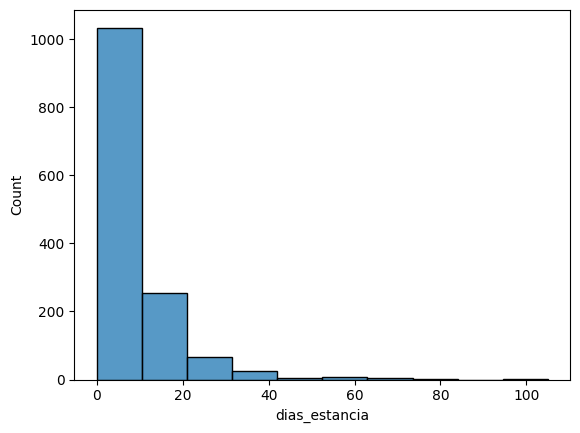

In [138]:
sns.histplot(plugin["dias_estancia"], bins=10, kde=False)  # set kde=True to add a density curve

In [139]:
def compare(data,models,transform,logtransform):
    out = []
    for i,model in enumerate(models):
        print(i/len(models))
        out.append(runmodel_regression(data,"dias_estancia",model,transform=transform,logtransform=logtransform))


    return out
    # ax = sns.barplot(x=out.ac_mean, y=modelnames)
    # ax.bar_label(ax.containers[1])
    # plt.axis('off')
    # plt.show()


In [140]:
modellist = [
    # LinearRegression(), #Linear Regression
    ElasticNet(random_state=0), #Elastic net
    # RandomForestRegressor(max_depth=3, random_state=0), #Random Forest
    GradientBoostingRegressor(),
    make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)), # SVM
    # MLPRegressor(random_state=1, max_iter=2000, tol=0.1) #Neural Network
]
namelist = [
    # "LR",
    "EN",
    # "RF",
    "GB",
    "SVR"
]

In [141]:
test = compare(plugin,modellist,False,False)
test2= compare(plugin,modellist,False,True) #logtransform
test3= compare(plugin,modellist,True,False) #yeo johnson transform

0.0
0.3333333333333333
0.6666666666666666
0.0
0.3333333333333333
0.6666666666666666
0.0
0.3333333333333333
0.6666666666666666


In [142]:
# pd.DataFrame.from_records(test)
tbltest=pd.DataFrame(test)
tbltest

,mae,rmse,r2,Ftime,Ptime,mae95,rmse95,r295,ft95,pt95
0,4.486834,7.942916,0.208258,0.005799,0.002600,0.189231,1.313432,0.378173,0.001443,0.000478
1,3.629500,6.090003,0.572125,1.338912,0.003244,0.288720,0.757795,0.047567,0.029207,0.000534
2,4.034191,7.907971,0.293029,0.099680,0.050351,0.441547,1.417321,0.052651,0.001584,0.001688


In [143]:
tbltest2=pd.DataFrame(test2) #holy shit, log did really good, actually, except for R2, obviously
tbltest2
# ASK IF THIS IS FINE!!!!!!!!

,mae,rmse,r2,Ftime,Ptime,mae95,rmse95,r295,ft95,pt95
0,4.719896,8.672330,0.146601,0.004000,0.002000,0.457981,1.412484,0.041558,6.867885e-07,0.000001
1,3.605654,6.589522,0.504769,1.301520,0.002594,0.380678,1.334385,0.093076,1.744941e-02,0.000475
2,3.590968,6.631053,0.503916,0.084352,0.035216,0.376009,1.335623,0.067305,2.740099e-03,0.002527


In [144]:
tbltest3=pd.DataFrame(test3)
tbltest3

,mae,rmse,r2,Ftime,Ptime,mae95,rmse95,r295,ft95,pt95
0,4.602226,8.387119,0.200291,0.003607,0.001592,0.428588,1.323342,0.036178,0.000472,0.000488
1,3.605394,6.552756,0.508316,1.283689,0.002597,0.369309,1.072804,0.072571,0.007474,0.000462
2,3.578873,6.622378,0.505234,0.090383,0.038027,0.363371,1.320453,0.064487,0.001573,0.000619


In [145]:
def plot_combined_subplots(tables, modelnames, columns_list, names, colors, figsize=(12, 4)):
    n_metrics = len(names)
    fig, axes = plt.subplots(1, n_metrics, figsize=figsize, sharey=False)
    
    if n_metrics == 1:
        axes = [axes]  # Make it iterable
    
    for i, (ax, table, columns, name, color) in enumerate(zip(axes, tables, columns_list, names, colors)):
        # Plot bars
        x_pos = np.arange(len(modelnames))
        bars = ax.bar(x_pos, table[columns[0]], yerr=table[columns[1]], 
                     capsize=5, color=color, edgecolor='black', alpha=0.8)
        
        ax.set_ylabel(name)
        ax.set_title(name, fontsize=12)
        ax.set_xticks(x_pos)
        ax.set_xticklabels(modelnames, rotation=45, ha='right')
        ax.grid(axis='y', linestyle='--', alpha=0.7)
        
        # Auto-zoom logic
        ymin = min(table[columns[0]])
        ymax = max(table[columns[0]])
        spread = ymax - ymin
        if spread < 0.025 * ymax:
            buffer = spread * 1.1
            ax.set_ylim(ymin - buffer, ymax + buffer)
    

        fig.suptitle('Complete Variable Set Model Comparison with 95% Confidence Intervals', 
                fontsize=14, fontweight='bold', y=0.98)
    plt.tight_layout()
    return fig, axes

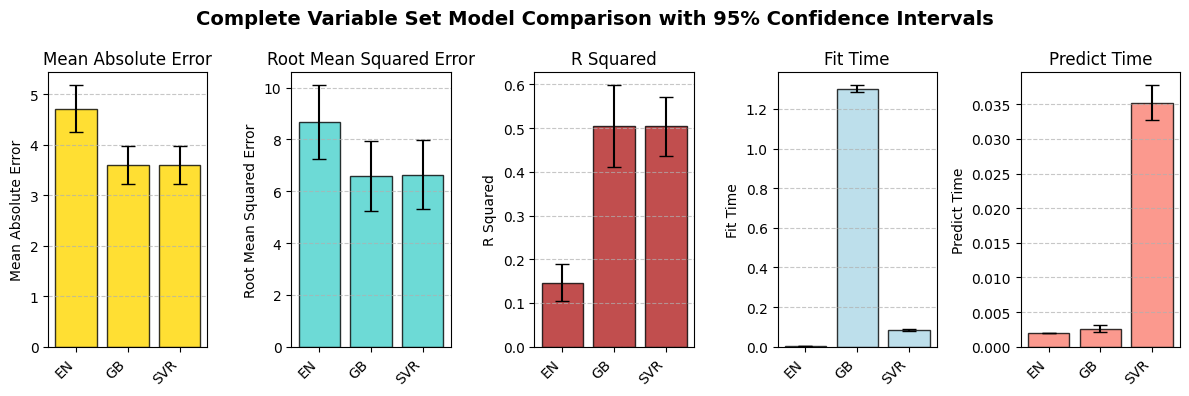

In [146]:
fig, axes = plot_combined_subplots([tbltest2,tbltest2,tbltest2,tbltest2,tbltest2,tbltest2],
                                   namelist,
                                  [ ["mae",    "mae95"],
                                    ["rmse",   "rmse95"],
                                    ["r2",      "r295"],
                                    ["Ftime","ft95"],
                                    ["Ptime","pt95"]],
                                  ['Mean Absolute Error', 'Root Mean Squared Error', 'R Squared', "Fit Time", "Predict Time"],
                                  ['gold', 'mediumturquoise', 'firebrick',"lightblue", "salmon"])

In [147]:
# def plotloop(table,modelnames,columns,name,color):
#     plt.bar(modelnames, table[columns[0]], yerr=table[columns[1]], capsize=10, color=color, edgecolor='black')
#     plt.ylabel(name)
#     plt.title(name +" with 95% Confidence Interval Error Bars")
#     plt.grid(axis='y', linestyle='--', alpha=0.7)


#     ymin = min(table[columns[0]])
#     ymax = max(table[columns[0]])
#     spread = ymax - ymin
#     if spread < 0.20*ymax:
#         buffer = spread * 0.2
#         plt.ylim(ymin - buffer, ymax + buffer)

#     plt.tight_layout()
#     plt.show()

In [148]:
# def plotstats(stattbl,modelnames):
#     plotloop(stattbl,modelnames,["mae",    "mae95"],"Mean Absolute Error","gold")
#     plotloop(stattbl,modelnames,["rmse",   "rmse95"],"Root Mean Squared Error","mediumturquoise")
#     plotloop(stattbl,modelnames,["r2",      "r295"],"R Squared","firebrick")
#     plotloop(stattbl,modelnames,["Ftime",          "ft95"],"Fit Time","lightgreen")
#     plotloop(stattbl,modelnames,["Ptime",       "pt95"],"Predict Time","lightblue")

I think elastic net, XGB and svr?

In [149]:
# plotstats(tbltest2,namelist)